# Major Air Pollutant Types from the Oil Refining Process
http://www.baaqmd.gov/research-and-data/air-quality-standards-and-attainment-status
- Ozone (O3)
- Carbon Monoxide (CO)
- Hydrogen Sulfide (H2S)
- Vinyl Chloride (C2H3Cl)

- Particulate Matter (PM)
- Nitrogen Oxides (NOx)
  - Nitrogen Dioxide (NO2)
- Sulfur Dioxide (SO2)
- Methane (CH4)

https://www.arb.ca.gov/app/emsinv/facinfo/facinfo.php

https://www.eia.gov/petroleum/imports/browser/#/?sid=PET_IMPORTS.WORLD-US-ALL.M~PET_IMPORTS.WORLD-RP_1-ALL.M~PET_IMPORTS.WORLD-RP_2-ALL.M~PET_IMPORTS.WORLD-RP_3-ALL.M~PET_IMPORTS.WORLD-RP_4-ALL.M~PET_IMPORTS.WORLD-RP_5-ALL.M~PET_IMPORTS.WORLD-RP_6-ALL.M&vs=PET_IMPORTS.WORLD-US-ALL.A

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
%matplotlib inline

In [2]:
all_grades = pd.read_csv("data/Imports_of_all_grades_from_country_of_origin_to_CA.csv",
                        header=0, index_col=0);

In [3]:
origins = all_grades.origin_var.unique()
origins

array(['World', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Azerbaijan', 'Belize', 'Bolivia', 'Brazil', 'Cameroon', 'Canada',
       'Chad', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Ecuador', 'Equatorial Guinea', 'Indonesia', 'Iraq', 'Italy',
       'Kuwait', 'Libya', 'Mauritania', 'Mexico', 'Netherlands', 'Nigeria',
       'Oman', 'Peru', 'Russia', 'Saudi Arabia', 'Thailand',
       'Trinidad and Tobago', 'United Arab Emirates', 'Venezuela'], dtype=object)

In [4]:
destinations = all_grades.destination_var.unique()
destinations

array(['CHEVRON USA / RICHMOND / CA', 'CHEVRON USA INC / EL SEGUNDO / CA',
       'DELTA TRADING LP - PALOMA / BAKERSFIELD / CA',
       'KERN OIL & REFINING / BAKERSFIELD / CA',
       'PARAMOUNT PETROLEUM CORP / PARAMOUNT / CA',
       'PHILLIPS 66 / LOS ANGELES / CA',
       'PHILLIPS 66 CO / SAN FRANCISCO / CA',
       'SHELL OIL PRODUCTS US / MARTINEZ / CA',
       'TESORO CORP / GOLDEN EAGLE / CA',
       'TESORO CORP / WILMINGTON LOS ANGELES / CA',
       'TESORO REFINING & MARKETING / CARSON / CA',
       'TORRANCE REFINING CO LLC / TORRANCE / CA',
       'UNKNOWN PROCESSOR-CA / UNKNOWN PROCESSOR-CA / CA',
       'VALERO REFINING CO CALIFORNIA / BENICIA / CA',
       'VALERO REFINING CO CALIFORNIA / WILMINGTON ASPHALT PLANT / CA',
       'VALERO REFINING CO CALIFORNIA / WILMINGTON REFINERY / CA'], dtype=object)

In [5]:
bay_area_refinieries = ['CHEVRON USA / RICHMOND / CA',
                        'PHILLIPS 66 CO / SAN FRANCISCO / CA',
                        'VALERO REFINING CO CALIFORNIA / BENICIA / CA',
                        'SHELL OIL PRODUCTS US / MARTINEZ / CA',
                        'TESORO CORP / GOLDEN EAGLE / CA']

In [6]:
Chevron_Richmond = all_grades[all_grades['destination_var'].str.contains("RICHMOND")]
Phillips_SanFrancisco = all_grades[all_grades['destination_var'].str.contains("SAN FRANCISCO")]
Valero_Benicia = all_grades[all_grades['destination_var'].str.contains("BENICIA")]
Shell_Martinez = all_grades[all_grades['destination_var'].str.contains("MARTINEZ")]
Tesoro_GoldenEagle = all_grades[all_grades['destination_var'].str.contains("GOLDEN EAGLE")]

In [7]:
Chevron_Richmond_2009 = Chevron_Richmond[Chevron_Richmond['years_var'] == 2009]
Phillips_SanFrancisco_2009 = Phillips_SanFrancisco[Phillips_SanFrancisco['years_var'] == 2009]
Valero_Benicia_2009 = Valero_Benicia[Valero_Benicia['years_var'] == 2009]
Shell_Martinez_2009 = Shell_Martinez[Shell_Martinez['years_var'] == 2009]
Tesoro_GoldenEagle_2009 = Tesoro_GoldenEagle[Tesoro_GoldenEagle['years_var'] == 2009]

[Bunch(patch=Poly((-0.25, 29516) ...), flows=[   378.      0.      0.    265.      0.      0.   8009.      0.      0.
       0.      0.      0.  45561.   4819.], angles=[0, None, None, 0, None, None, 0, None, None, None, None, None, 0, 0], tips=[[   159.33983029  29327.        ]
  [     0.              0.        ]
  [     0.              0.        ]
  [   111.68070113  29005.5       ]
  [     0.              0.        ]
  [     0.              0.        ]
  [  3360.42447305  24868.5       ]
  [     0.              0.        ]
  [     0.              0.        ]
  [     0.              0.        ]
  [     0.              0.        ]
  [     0.              0.        ]
  [ 19115.10914803  -1916.5       ]
  [  2021.56056132 -27106.5       ]], text=Text(0,0,''), texts=[<matplotlib.text.Text object at 0x1079dfc18>, <matplotlib.text.Text object at 0x1079ec080>, <matplotlib.text.Text object at 0x1079ec5c0>, <matplotlib.text.Text object at 0x1079dfbe0>, <matplotlib.text.Text object at 0x1079f5

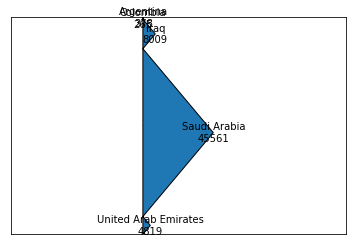

In [8]:
sankey = Sankey()
sankey.add(flows=Chevron_Richmond_2009['dat_var'][1:],
           orientations = [0]*14,
           labels=list(Chevron_Richmond_2009['origin_var'][1:]))
sankey.finish()